In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install adfuller

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement adfuller (from versions: none)
ERROR: No matching distribution found for adfuller


In [5]:
df = pd.read_csv("VCB3.csv")
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1747,11/24/2022,73.0,73.5,74.0,72.5,1.08M,-0.68%
1748,11/25/2022,73.1,73.1,73.6,72.8,1.68M,0.14%
1749,11/28/2022,76.7,74.5,77.0,73.8,1.34M,4.92%
1750,11/29/2022,79.8,76.0,79.8,76.0,1.71M,4.04%
1751,11/30/2022,81.0,80.3,81.0,77.0,1.32M,1.50%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1752 non-null   object 
 1   Price     1752 non-null   float64
 2   Open      1752 non-null   float64
 3   High      1752 non-null   float64
 4   Low       1752 non-null   float64
 5   Vol.      1752 non-null   object 
 6   Change %  1752 non-null   object 
dtypes: float64(4), object(3)
memory usage: 95.9+ KB


In [ ]:
df.describe()

,Price,Open,High,Low
count,1752.000000,1752.000000,1752.000000,1752.000000
mean,53.197012,53.157417,53.816959,52.516457
std,20.532650,20.515369,20.751908,20.236389
min,20.798000,20.798000,21.552000,20.475000
25%,29.154750,29.164000,29.560500,28.826000
50%,53.294000,53.072000,54.174500,52.142000
75%,73.412500,73.548000,74.305500,72.500000
max,95.800000,95.800000,96.000000,92.600000


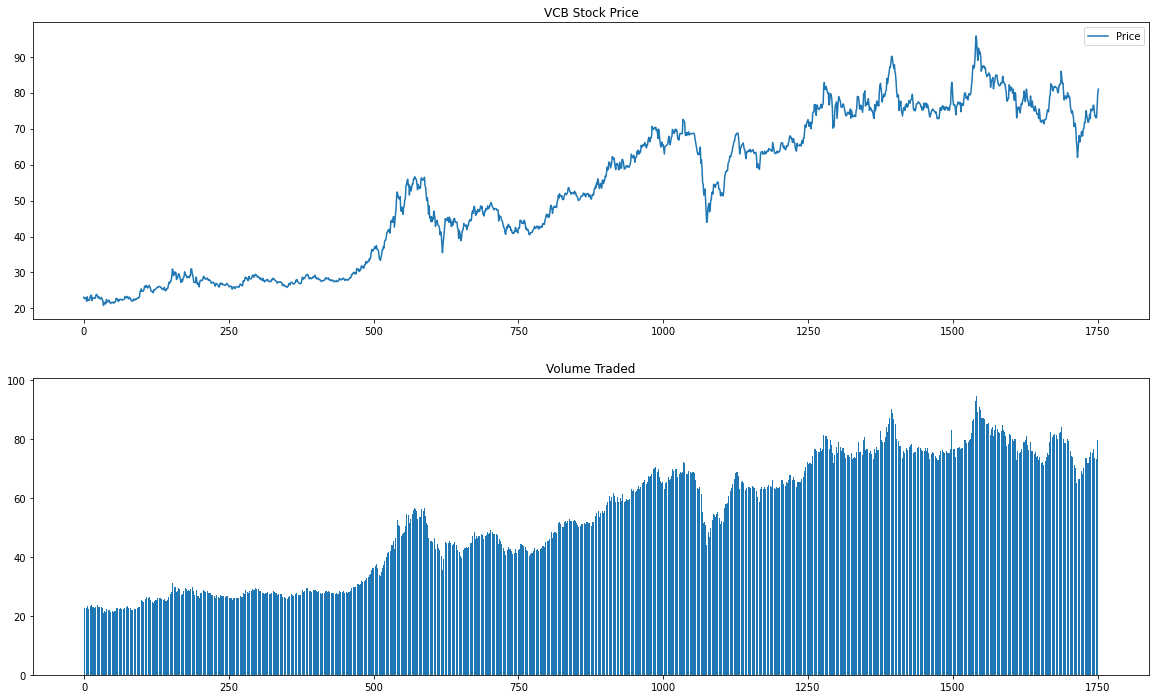

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
plt.title('VCB Stock Price')
plt.plot(df.Price, label='Price')
plt.legend()
plt.subplot(2,1,2)
plt.title('Volume Traded')
plt.bar(x=df.index, height=df['Price'])
plt.show()

In [ ]:
data = list(df['Price'])

In [ ]:
#train test split
to_row=int(len(df)*0.8)
training_data=df[0:to_row]['Price']
testing_data=df[0:to_row]['Price']

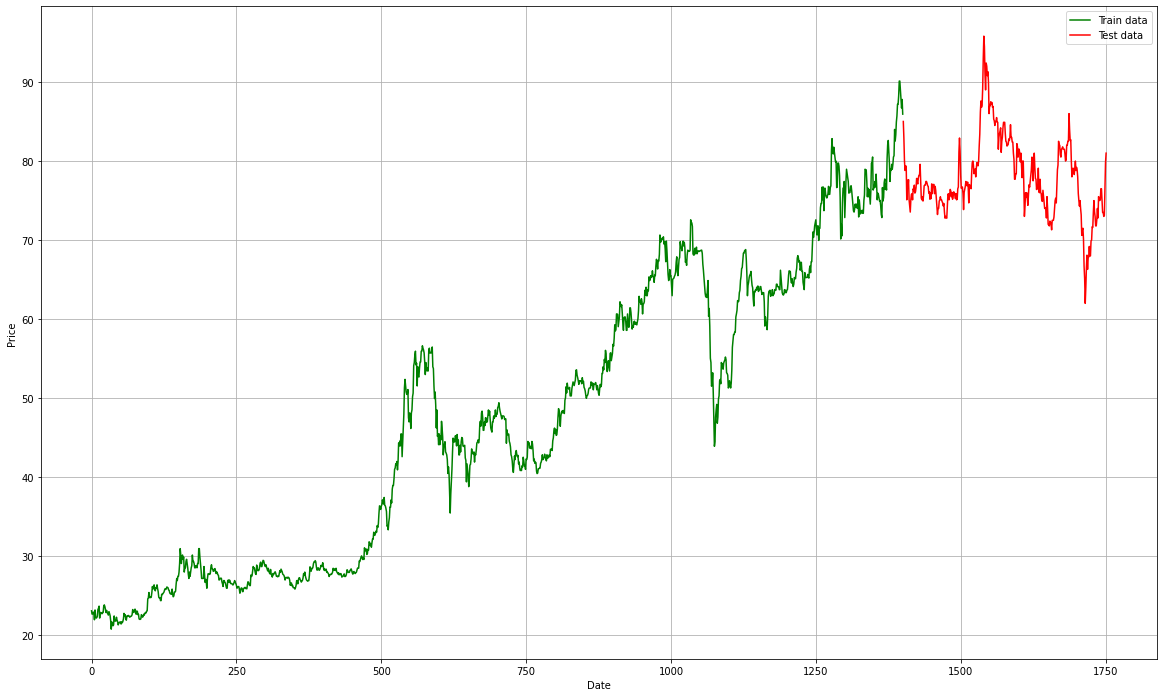

In [ ]:
#split data into train and training set
plt.figure(figsize=(20,12))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df[0:to_row]['Price'],'green',label='Train data')
plt.plot(df[to_row:]['Price'],'red',label='Test data')
plt.legend()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print("1. ADF: ", result[0])
print("2. p-value: ", result[1])
print("3. Num of Lags: ", result[2])
print("4. Num of Observations Used for ADF Regression: ", result[3])
print("5. Critical Values: ")
for key, val in result[4].items():
    print("\t", key, ": ", val)

1. ADF:  -1.1396862647445123
2. p-value:  0.6989889057140535
3. Num of Lags:  9
4. Num of Observations Used for ADF Regression:  1742
5. Critical Values: 
	 1% :  -3.4341094501874854
	 5% :  -2.8632005876775297
	 10% :  -2.567654048515701


In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.8 MB/s 
     |████████████████████████████████| 9.9 MB 23.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [ ]:
to_row
x_train = df[:to_row]
x_test = df[to_row:]
print(len(x_train), len(x_test))

1401 351


In [ ]:
stepwise_fit = auto_arima(data, trace = True, suppress_warnings = True)
print(stepwise_fit.summary)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5095.799, Time=3.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5103.579, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5104.906, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5104.923, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5103.354, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5107.528, Time=1.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5107.558, Time=2.00 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5094.687, Time=3.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5105.172, Time=0.94 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5095.997, Time=5.64 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.37 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5094.638, Time=3.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5105.401, Time=1.14 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=5100.221, Time=4.98 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : 

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(2,1,3))
model_2 = sm.tsa.arima.ARIMA(x_train['Price'], order=(2,1,3))

In [ ]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1752
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2541.190
Date:                Mon, 02 Jan 2023   AIC                           5094.380
Time:                        12:12:11   BIC                           5127.188
Sample:                             0   HQIC                          5106.508
                               - 1752                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3887      0.048      8.170      0.000       0.295       0.482
ar.L2         -0.8696      0.042    -20.654      0.000      -0.952      -0.787
ma.L1         -0.3709      0.050     -7.378      0.000      -0.469      -0.272
ma.L2          0.8991      0.038     23.737      0.000       0.825       0.973
ma.L3         -0.0267      0.020     -1.367      0.172      -0.065       0.012
sigma2         1.0668      0.023     46.243      0.000       1.022       1.112
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               709.27
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               4.54   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
result2 = model_2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1401
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1902.217
Date:                Mon, 02 Jan 2023   AIC                           3816.435
Time:                        12:12:15   BIC                           3847.900
Sample:                             0   HQIC                          3828.197
                               - 1401                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4239      0.091      4.636      0.000       0.245       0.603
ar.L2         -0.7458      0.071    -10.534      0.000      -0.885      -0.607
ma.L1         -0.4364      0.090     -4.829      0.000      -0.614      -0.259
ma.L2          0.8125      0.066     12.394      0.000       0.684       0.941
ma.L3         -0.0730      0.021     -3.489      0.000      -0.114      -0.032
sigma2         0.8865      0.020     44.672      0.000       0.848       0.925
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               982.05
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               8.32   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(x_train)
end = len(x_train)+len(x_test)-1
pred = result.predict(start = start, end = end)
pred2 = result2.predict(start = start, end = end)
pred2 

1401    86.164042
1402    85.912242
1403    85.783507
1404    85.916724
1405    86.069199
          ...    
1747    85.956913
1748    85.956913
1749    85.956913
1750    85.956913
1751    85.956913
Name: predicted_mean, Length: 351, dtype: float64

In [ ]:
s = pd.Series(pred, index = df.index[to_row:])
s

1401    86.010280
1402    84.800994
1403    82.761162
1404    80.091953
1405    78.911237
          ...    
1747    73.313309
1748    73.140544
1749    73.301821
1750    76.724141
1751    79.790036
Length: 351, dtype: float64

In [ ]:
pred

array([86.01027979, 84.8009941 , 82.76116203, 80.09195335, 78.91123738,
       79.40023953, 79.33359511, 74.95942493, 77.4626138 , 76.89609999,
       77.76502209, 74.91835789, 74.04433425, 73.63941088, 75.40033516,
       75.8950059 , 75.61822466, 74.88849971, 76.64302469, 76.55218253,
       76.88935752, 75.67199201, 76.02199366, 76.90250821, 77.99953113,
       77.19152521, 76.83722345, 77.94304402, 78.48979986, 78.23112642,
       79.35253037, 77.38639401, 75.36260288, 75.18860609, 75.54317358,
       74.88955545, 75.63332051, 76.95309774, 77.07107194, 76.89870048,
       77.30200464, 77.44299653, 77.28303863, 76.87554388, 76.7094466 ,
       75.90908045, 76.1496676 , 75.23460883, 75.90980329, 75.21875728,
       77.12499117, 75.95613412, 76.98296891, 77.00498158, 77.03731629,
       75.87520626, 76.77845689, 76.29507294, 75.22544741, 74.16845543,
       73.21284974, 74.08286988, 74.10921592, 74.91008899, 75.02964743,
       75.4773011 , 75.1527003 , 75.09948169, 74.8203561 , 74.68

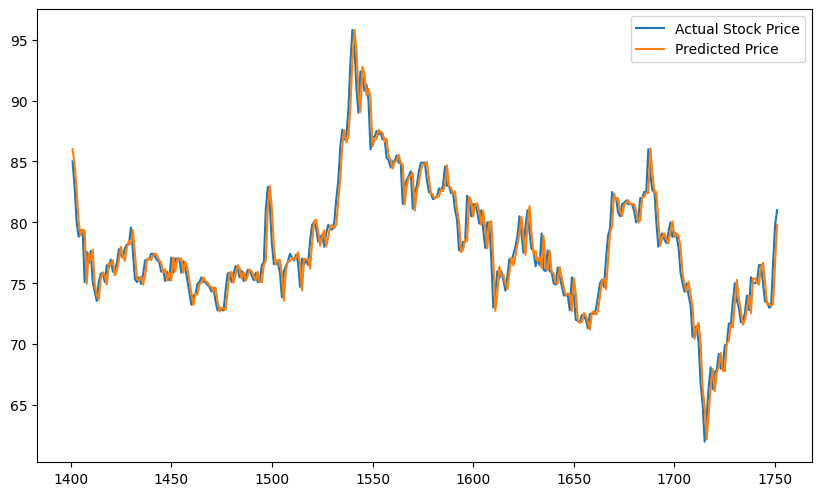

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
df['Price'][to_row:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

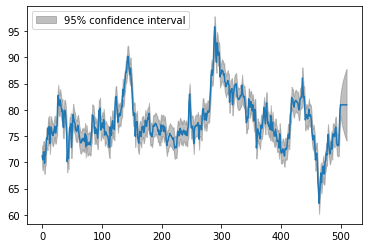

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(result, start=len(df)-500, end=len(df)+10, dynamic = False);

In [ ]:
#preducting future 30 days
pred_future = result.predict(start = end, end = end+30)
pred_future

array([79.79003625, 80.99657528, 80.95737174, 80.91278157, 80.9295389 ,
       80.97482897, 80.97786304, 80.93965813, 80.92216772, 80.94859153,
       80.97407336, 80.96100107, 80.9337602 , 80.93453815, 80.95852932,
       80.96717927, 80.94967909, 80.93535396, 80.94500335, 80.96121168,
       80.95912144, 80.94421407, 80.94023657, 80.95165384, 80.95955109,
       80.95269261, 80.94315894, 80.94541693, 80.95458522, 80.9561858 ,
       80.94883524])

In [ ]:
import datetime
start_date = datetime.datetime(2022,12,1)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(31)]

In [ ]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-01    79.790036
2022-12-02    80.996575
2022-12-03    80.957372
2022-12-04    80.912782
2022-12-05    80.929539
2022-12-06    80.974829
2022-12-07    80.977863
2022-12-08    80.939658
2022-12-09    80.922168
2022-12-10    80.948592
2022-12-11    80.974073
2022-12-12    80.961001
2022-12-13    80.933760
2022-12-14    80.934538
2022-12-15    80.958529
2022-12-16    80.967179
2022-12-17    80.949679
2022-12-18    80.935354
2022-12-19    80.945003
2022-12-20    80.961212
2022-12-21    80.959121
2022-12-22    80.944214
2022-12-23    80.940237
2022-12-24    80.951654
2022-12-25    80.959551
2022-12-26    80.952693
2022-12-27    80.943159
2022-12-28    80.945417
2022-12-29    80.954585
2022-12-30    80.956186
2022-12-31    80.948835
dtype: float64

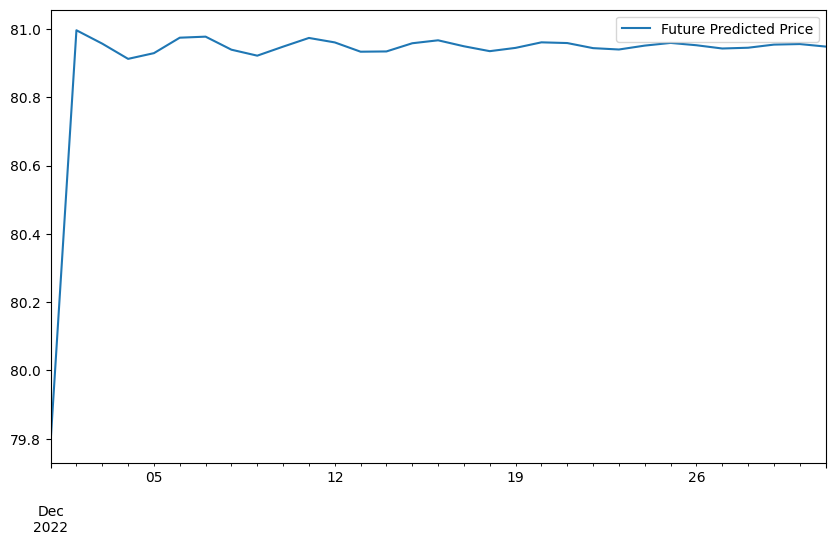

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
pred_future2.plot(label='Future Predicted Price', legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [ ]:
#Using MAE to measure the accuracy of a model
mape = mean_absolute_percentage_error(x_test.Price, pred2)
mse = mean_squared_error(x_test.Price, pred2)
rmse = np.sqrt(mse)
print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.0f}")
print(f"MSE: {mse:.2f}")

MAPE: 11.21%
RMSE: 9
MSE: 89.11


In [ ]:
x_test.Price

1401    85.006
1402    82.916
1403    80.051
1404    78.813
1405    79.355
         ...  
1747    73.000
1748    73.100
1749    76.700
1750    79.800
1751    81.000
Name: Price, Length: 351, dtype: float64